In [1]:
#Importation les modules:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Importation des données

In [2]:
data = pd.read_excel('./ONLINE_RETAILS.xlsx')
#data


# Première analyse


## Affichage de lignes du DataFrame

In [3]:
#Afficher les premières lignes du DataFrame :

data.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Afficher les dernières lignes du DataFrame :

data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#Afficher des lignes prises au hasard du DataFrame :

data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
239378,558046,22624,IVORY KITCHEN SCALES,2,2011-06-24 13:47:00,8.50,NaN,EIRE
507210,579168,20983,12 PENCILS TALL TUBE RED RETROSPOT,24,2011-11-28 14:12:00,0.85,17806.0,United Kingdom
79283,542928,22549,PICTURE DOMINOES,24,2011-02-02 10:22:00,1.45,17863.0,United Kingdom
347977,567363,23028,NaN,-49,2011-09-19 16:58:00,0.00,NaN,United Kingdom
453563,575485,21231,SWEETHEART CERAMIC TRINKET BOX,12,2011-11-09 17:03:00,1.25,18274.0,United Kingdom
516790,579949,23498,CLASSIC BICYCLE CLIPS,12,2011-12-01 11:00:00,1.45,16700.0,United Kingdom
205496,554814,22470,HEART OF WICKER LARGE,12,2011-05-26 13:34:00,2.95,16609.0,United Kingdom
524476,580595,23543,WALL ART KEEP CALM,2,2011-12-05 10:38:00,8.25,14194.0,United Kingdom
497531,578400,21389,IVORY HANGING DECORATION BIRD,4,2011-11-24 11:52:00,0.85,12748.0,United Kingdom
454836,575602,22536,MAGIC DRAWING SLATE PURDEY,3,2011-11-10 12:27:00,0.42,17059.0,United Kingdom


## Caractéristiques des colonnes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- Il y a 1 colonne de type datetime64[ns], 2 colonnes de type float64, 1 colonne de type int64 et 4 colonnes de type object.
- Parmi ces colonnes, on peut constater qu'il existe des valeurs manquantes pour les colonnes "Description" et "CustomerID" donc on peut suppimer ces valeurs.
- Afin d'avoir une bonne visualisation, il convient de transformer la colonne " CustomerID" en type int.

## Nettoyage des données

In [7]:
#Suppimer les valeurs manquantes qui aident pas à calculer les ventes

data = data.replace(r'^s*$', float('NaN'), regex = True)  # Replace des espaces vides par NaN
data.dropna(subset = ['CustomerID'], inplace = True)      # Supprimer les lignes avec NaN


In [8]:
#Suppimer les valeurs négatives qui aident pas à calculer les ventes

data[data['Quantity'] < 0] = 0
data = data[(data != 0).all(1)]


In [9]:
#Transformer la colonne "CustomerID" en type int

data['CustomerID'] = data['CustomerID'].astype('int')


In [10]:
#Transformer la colonne "InvoiceDate" en type datetime64[ns]

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [11]:
data.info()     #afficher les caractéristiques des colonnes après le nettoyage

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  int32         
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(4)
memory usage: 25.8+ MB


# Analyse approfondie

## Analyse des statistiques descriptives

In [12]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## Installation

In [13]:
pip install -U pandasql

Note: you may need to restart the kernel to use updated packages.


In [14]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

## Questions

### Volume

Lors d’une dépense, combien de produits un client achète-t-il généralement ? 
Tracez la distribution associée.
Faîtes apparaître le nombre moyen
et le nombre médian de produits acheté lors d’une dépense, par pays.

In [15]:
#Le nombre de produits un client achète généralement lors d’une dépense

volume = """SELECT CustomerID as Client, SUM(Quantity) as Volume
              FROM data 
          GROUP BY InvoiceNo ;"""

pysqldf(volume)   

,Client,Volume
0,17850,40
1,17850,12
2,13047,83
3,13047,15
4,13047,3
...,...,...
18527,13777,76
18528,13777,120
18529,15804,278
18530,13113,66


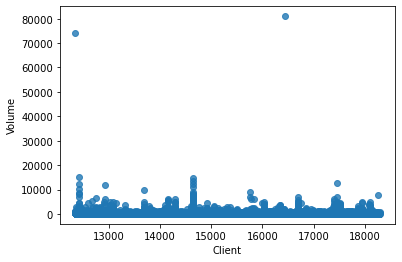

In [16]:
# Graphique à nuage de points

sns.regplot(x=pysqldf(volume)['Client'],y = pysqldf(volume)['Volume'], fit_reg=False)
plt.show()

In [17]:
#Le nombre moyen de produits acheté lors d’une dépense, par pays

avg = """SELECT Country, AVG(Quantity) as Moyenne
           FROM data
       GROUP BY Country ;"""

pysqldf(avg)  


,Country,Moyenne
0,Australia,70.982234
1,Austria,12.263819
2,Bahrain,15.294118
3,Belgium,11.441162
4,Brazil,11.125000
5,Canada,18.298013
6,Channel Islands,12.688503
7,Cyprus,10.359935
8,Czech Republic,26.840000
9,Denmark,21.671053


In [18]:
#Le nombre médian de produits acheté lors d’une dépense, par pays

data.groupby(['Country'])['Quantity'].median()

Country
Australia               32
Austria                 10
Bahrain                  6
Belgium                 10
Brazil                  10
Canada                  12
Channel Islands         10
Cyprus                   5
Czech Republic          24
Denmark                 12
EIRE                    12
European Community       6
Finland                 10
France                  10
Germany                 10
Greece                  10
Iceland                 12
Israel                  12
Italy                    8
Japan                   48
Lebanon                  8
Lithuania               16
Malta                    6
Netherlands             72
Norway                  12
Poland                  10
Portugal                10
RSA                      6
Saudi Arabia            12
Singapore               12
Spain                    6
Sweden                  24
Switzerland             12
USA                     12
United Arab Emirates    12
United Kingdom           4
Unspecified         

### Montant

Lors d’une dépense, quel est le montant dépensé par un client
généralement ? Tracez la distribution associée. Faîtes apparaître le montant
moyen et le montant médian d’un panier client, par pays.

In [19]:
#Le montant dépensé par un client lors d’une dépense

montant_depense = """SELECT CustomerID, SUM(Quantity*UnitPrice) as Montant
                     FROM data
                 GROUP BY InvoiceNo;"""

pysqldf(montant_depense)

,CustomerID,Montant
0,17850,139.12
1,17850,22.20
2,13047,278.73
3,13047,70.05
4,13047,17.85
...,...,...
18527,13777,124.60
18528,13777,140.64
18529,15804,329.05
18530,13113,339.20


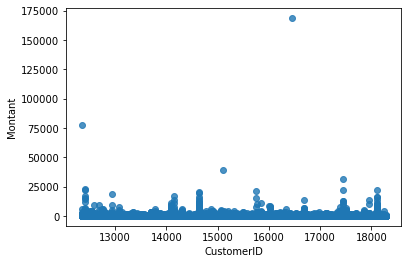

In [20]:
# Graphique à nuage de points

sns.regplot(x=pysqldf(montant_depense)['CustomerID'],y = pysqldf(montant_depense)['Montant'], fit_reg=False)
plt.show()

In [21]:
#Le montant moyen d’un panier client, par pays

montant_moyenne = """SELECT Country, AVG(Montant) as MontantMoyenne
                       FROM (SELECT Country, SUM(Quantity*UnitPrice) as Montant FROM data GROUP BY InvoiceNo) 
                   GROUP BY Country ;"""

pysqldf(montant_moyenne)

,Country,MontantMoyenne
0,Australia,2430.198421
1,Austria,599.922353
2,Bahrain,274.200000
3,Belgium,420.370816
4,Brazil,1143.600000
5,Canada,611.063333
6,Channel Islands,786.555385
7,Cyprus,849.398750
8,Czech Republic,413.370000
9,Denmark,1053.074444


In [22]:
from sqlite3 import connect
conn = connect(':memory:')

data.to_sql('data_sql',conn)

#Le montant d'un panier client
df_1 = pd.read_sql ("""SELECT Country, SUM(Quantity*UnitPrice) as Montant 
                        FROM data_sql 
                        GROUP BY InvoiceNo""",conn )  

df_1

,Country,Montant
0,United Kingdom,139.12
1,United Kingdom,22.20
2,United Kingdom,278.73
3,United Kingdom,70.05
4,United Kingdom,17.85
...,...,...
18527,United Kingdom,124.60
18528,United Kingdom,140.64
18529,United Kingdom,329.05
18530,United Kingdom,339.20


In [23]:
#Le montant médian d’un panier client, par pays

df_1.groupby(['Country'])['Montant'].median()

Country
Australia                429.600
Austria                  534.700
Bahrain                  274.200
Belgium                  346.390
Brazil                  1143.600
Canada                   542.590
Channel Islands          717.570
Cyprus                   573.945
Czech Republic           413.370
Denmark                  515.100
EIRE                     684.720
European Community       289.225
Finland                  408.340
France                   377.660
Germany                  356.110
Greece                   609.740
Iceland                  584.910
Israel                   779.100
Italy                    329.530
Japan                   1607.040
Lebanon                 1693.880
Lithuania                250.500
Malta                    743.430
Netherlands              806.880
Norway                   631.270
Poland                   317.780
Portugal                 461.590
RSA                     1002.310
Saudi Arabia             145.920
Singapore               2118.740
Sp

### Volume

Quels sont les top-5 produits les plus vendus durant le premier
trimestre 2011 ? Pendant le second trimestre 2011 ?


In [24]:
#Les top-5 produits les plus vendus durant le premier trimestre 2011

top5_1er = """SELECT StockCode, Description, Quantity, InvoiceDate 
                FROM data
               WHERE InvoiceDate BETWEEN "2011-01-01 00:00:00" AND "2011-03-31 23:59:59" 
                 ORDER BY Quantity DESC
               LIMIT 5;"""

pysqldf(top5_1er)

,StockCode,Description,Quantity,InvoiceDate
0,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00.000000
1,22053,EMPIRE DESIGN ROSETTE,3906,2011-02-22 10:43:00.000000
2,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00.000000
3,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2592,2011-02-03 10:50:00.000000
4,22693,GROW A FLYTRAP OR SUNFLOWER IN TIN,2400,2011-02-11 11:22:00.000000


In [25]:
#Les top-5 produits les plus vendus pendant le second trimestre 2011

top5_2nd = """SELECT StockCode, Description, Quantity, InvoiceDate 
                FROM data
               WHERE InvoiceDate BETWEEN "2011-04-01 00:00:00" AND "2011-06-30 23:59:59" 
            ORDER BY Quantity DESC
               LIMIT 5;"""

pysqldf(top5_2nd)

,StockCode,Description,Quantity,InvoiceDate
0,22197,SMALL POPCORN HOLDER,4300,2011-05-27 10:52:00.000000
1,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00.000000
2,21977,PACK OF 60 PINK PAISLEY CAKE CASES,2700,2011-05-23 13:08:00.000000
3,21175,GIN + TONIC DIET METAL SIGN,2000,2011-04-18 13:20:00.000000
4,16014,SMALL CHINESE STYLE SCISSOR,2000,2011-05-06 13:03:00.000000


### Montant

Quels sont les 5 pays qui ont générés le plus gros chiffre d’affaire
pendant le premier trimestre 2011 ?

In [26]:
top5pays = """ SELECT Country, SUM(Quantity*UnitPrice) as CA, InvoiceDate 
               FROM data
              WHERE InvoiceDate BETWEEN "2011-01-01 00:00:00" AND "2011-03-31 23:59:59"  
           GROUP BY Country
           ORDER BY CA DESC
              LIMIT 5;"""

pysqldf(top5pays)

,Country,CA,InvoiceDate
0,United Kingdom,1265044.28,2011-01-04 10:00:00.000000
1,Netherlands,72039.56,2011-01-14 12:24:00.000000
2,EIRE,53705.07,2011-01-09 16:07:00.000000
3,Australia,40937.12,2011-01-06 11:12:00.000000
4,Germany,40884.58,2011-01-07 10:04:00.000000


### Montant

Tracez l’évolution mensuelle du montant moyen et du montant
médian d’un panier client pour chacun de ces cinq pays.

In [27]:
#Extraire les mois 

data['Month'] = data['InvoiceDate'].dt.month



In [28]:
#Extraire les dates 

data['Day'] = data['InvoiceDate'].dt.day

In [29]:
#Mettre à jour avec les nouvelles colonnes "Month" et "Day"

from sqlite3 import connect
conn = connect(':memory:')

data.to_sql('data_sql',conn)

In [30]:
#L’évolution mensuelle du montant moyen d’un panier client pour chacun de ces cinq pays

df_3 = pd.read_sql (""" SELECT Country, AVG(Montant) as MontantMoyenne, Month
                        FROM
                             (SELECT Country, SUM(Quantity*UnitPrice) as Montant,Month 
                                FROM data_sql 
                            GROUP BY InvoiceNo)
                        GROUP BY Month""" ,conn )  

df_3

,Country,MontantMoyenne,Month
0,United Kingdom,576.945329,1
1,United Kingdom,448.482798,2
2,United Kingdom,450.795428,3
3,United Kingdom,408.355406,4
4,United Kingdom,436.395215,5
5,United Kingdom,474.668837,6
6,United Kingdom,450.857258,7
7,United Kingdom,504.174922,8
8,United Kingdom,542.927853,9
9,United Kingdom,538.786309,10


In [ ]:
plt.plot(result,color = 'red')
plt.plot(moyenne,color = 'purple')
plt.xlabel('Month')
plt.ylabel('MontantMoyenne')
leg = plt.legend()
plt.show()

## Fréquence


 A quelle fréquence dépensent les 100 plus gros clients du RoyaumeUni ?


In [31]:


df_2 = pd.read_sql ("""SELECT CustomerID, SUM(Quantity*UnitPrice) as Total
                        FROM data_sql 
                       WHERE Country = "United Kingdom" 
                    GROUP BY InvoiceNo 
                   ORDER BY Total DESC""",conn )  

df_2

,CustomerID,Total
0,16446,168469.60
1,12346,77183.60
2,15098,38970.00
3,17450,31698.16
4,18102,22206.00
...,...,...
16641,17790,0.95
16642,16554,0.85
16643,14744,0.55
16644,16669,0.40


In [32]:
frequence = df_2.groupby('CustomerID').count()   #fréquence
frequence

,Total
CustomerID,
12346,1
12747,11
12748,209
12749,5
12820,4
...,...
18280,1
18281,1
18282,2


In [33]:


frequence.nlargest(100,'Total')   #La fréquence que dépensent les 100 plus gros clients du RoyaumeUni

,Total
CustomerID,
12748,209
17841,124
13089,97
14606,93
15311,91
...,...
18172,20
18229,20
13267,19


## Modèles

In [34]:
df_4 = pd.read_sql ( """ SELECT SUM(Quantity*UnitPrice) as CA, Day
                           FROM data_sql
                        GROUP BY InvoiceNo""" , conn)

df_4

,CA,Day
0,139.12,1
1,22.20,1
2,278.73,1
3,70.05,1
4,17.85,1
...,...,...
18527,124.60,9
18528,140.64,9
18529,329.05,9
18530,339.20,9


In [35]:
#Construire X et Y:

X = df_4['Day']        # variable explicative
y = df_4['CA']    # variable à expiquer

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
from sklearn.svm import SVR

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

In [ ]:
y_pred = regressor.predict(6.5)